In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import quad
from math import pi

# Using classes
classes help you keep your code neat.

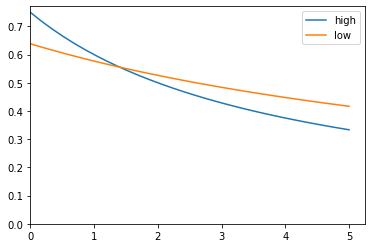

In [27]:
α = 3.
# defining the group
class Group:
    def __init__(self,y,ū,t):
        self.y = y
        self.ū = ū
        self.t = t
    
    def p̄(self,x): #we derived this from u(s,z) = z + 2 (αs)^(.5)
        return α/(self.ū+self.t*x - self.y)
    
    def s̄(self,x):
        return α/(self.p̄(x)**2)
    
    #add more functions as you will
    
g1 = Group(y=4,ū=8,t=1.)
g2 = Group(t=0.5,y=2,ū=6.7)
xs = np.linspace(0,5,30)
ps1 = g1.p̄(xs)
ps2 = g2.p̄(xs)
plt.plot(xs,ps1,label='high')
plt.plot(xs,ps2,label='low')
plt.legend();plt.ylim(0,plt.ylim()[1]);plt.xlim(0,plt.xlim()[1]);

# Upper envelope

There are two ways to calculate the upper envelope of $\bar{p}_1$ and $\bar{p}_2$.

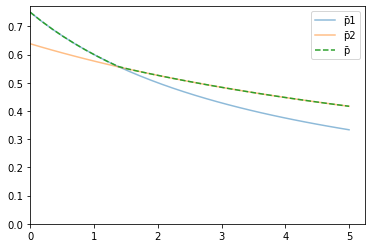

In [28]:
#First, if you have a pair of arrays, you can use np.maximum
# p̄ = np.maxi
plt.plot(xs,ps1,label='p̄1',alpha=0.5)
plt.plot(xs,ps2,label='p̄2',alpha=0.5)
plt.plot(xs,np.maximum(ps1,ps2),label='p̄',ls='--') #here is the maximum of each item in the sequence
plt.legend();plt.ylim(0,plt.ylim()[1]);plt.xlim(0,plt.xlim()[1]);

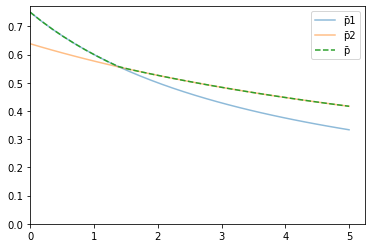

In [29]:
#another way is to create a function
p̄ = lambda x: g1.p̄(x) if g1.p̄(x)>g2.p̄(x) else g2.p̄(x)
#this is the same as defining
def p̄(x):
    p1,p2 = g1.p̄(x),g2.p̄(x)
    if p1>p2:
        return p1
    else:
        return p2
    
#in either case, you'll want to vectorize it
p̄ = np.vectorize(p̄)
plt.plot(xs,ps1,label='p̄1',alpha=0.5)
plt.plot(xs,ps2,label='p̄2',alpha=0.5)
plt.plot(xs,p̄(xs),label='p̄',ls='--') #here we apply our function
plt.legend();plt.ylim(0,plt.ylim()[1]);plt.xlim(0,plt.xlim()[1]);

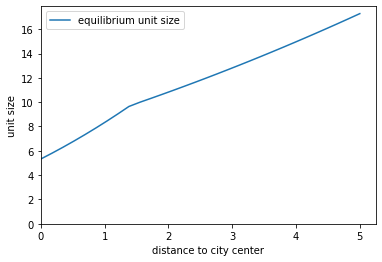

In [30]:
# i can also use the ternary operator to get the size of housing units at different point
s̄ = np.vectorize(lambda x: g1.s̄(x) if g1.p̄(x)>g2.p̄(x) else g2.s̄(x))
plt.plot(xs,s̄(xs),label='equilibrium unit size')
plt.ylabel('unit size')
plt.xlabel('distance to city center')
plt.ylim(0,plt.ylim()[1]);plt.xlim(0,plt.xlim()[1]);plt.legend()

## figuring out where one group starts and the other ends

In [36]:
πa = 0.4 #the agricultural land rent
xdivider = opt.root(lambda xa: g1.p̄(xa)-g2.p̄(xa),x0=5).x[0] #the dividing line
xa = opt.root(lambda xa: g2.p̄(xa)-πa,x0=5).x[0] #we choose group two for this because it's dominant further out IN THIS MODEL
print('the dividing line is {:.2f}'.format(xdivider))
print('the limit of the city is {:.2f}'.format(xa))
#note this is a model without buildings, so you can just set p̄ of each group equal

the dividing line is 1.40
the limit of the city is 5.60


In [37]:
#in turn, if I want the populations, i can do something like
# (note this is not the only way to do this)
N1 = quad(lambda r: 1/s̄(r),0,xdivider)[0]
N2 = quad(lambda r: 1/s̄(r),xdivider,xa)[0]